# STAT 440 Statistical Data Management - Fall 2021
## Week 10 Notes
### Created by Christopher Kinson


***


## Table of Contents

- [Validating data](#validating)
  - [Strategy 1 - Filtering and arranging](#stra1)
  - [Strategy 2 - Counting frequencies and duplicates](#stra2)
  - [Strategy 3 - Computing summary statistics](#stra3)
  - [Strategy 4 - Visualizing distributions](#stra4)
- [Cleaning data](#cleaning)
  - [Approach 1 - Removing duplicate observations](#appr1)
  - [Approach 2 - Fixing rounding errors and inconsistent units of measurement](#appr2)
  - [Approach 3 - Removing or replacing missing values](#appr3)
  - [Approach 4 - Limiting a distribution to its realistic set of observations](#appr4)
  - [Approach 5 - Correcting and subsetting with dates](#appr5)
  - [Approach 6 - Correcting misspelled words, abbreviations, or text cases](#appr6)


***


## <a name="validating"></a>Validating data

Validation means the checking of something for its accuracy. Validating data means checking a dataset for invalid or inaccurate entries. This kind of checking is important because as data workers we do not want analyses to start with bad or incorrect data. The first step consists of defining errors. Data errors or data glitches are those data entries that should not be there and may be caused by human error or machine error. Maybe not always, but often these errors are fixable with enough context and background information about the data.

Some common data errors include:

 - duplicate observations (rows)

 - lack of correspondence across fields (columns)

 - inconsistent measurements and/or units

 - values that are beyond outliers

 - variable formatting (e.g. date, numeric vs character)

 - misspelled words and nonstandard abbreviations

 - a patterned inaccuracy affecting a large number of records

In this section of the notes, we will utilize data validation strategies that could help us identify data errors.

### <a name="stra1"></a>Strategy 1 - Filtering and arranging

We can view a print out of a subset based on specific conditions to identify values that either go against or with the conditions. Arranging may help organize the values to quickly assess start or end points. Do review arranging data (Week 04 notes) and data reduction (Week 05 notes) and pay special attention to how to implement regular expressions in your preferred programming language (Week 07 notes). **There are alternatives to using regular expressions to deal with character strings. Just as there are coding alternatives to achieve most results for this course. Students must do what they are comfortable with so long as it is in alignment with an assignment's instructions.**

Working with the City of Urbana's [Rental Inspection Grades Listing Data as comma-separated .csv - GHE](https://github-dev.cs.illinois.edu/stat440-fa21/stat440-fa21-course-content/raw/master/data/rental-inspections-grades-data01.csv) or [Rental Inspection Grades Listing Data as comma-separated .csv - Box](https://uofi.box.com/shared/static/l9o50efbnemdnaxury4hg45cj8b2truu.csv), we can validate that there is a small number of properties earning an inspection grade of A since year 2019. 


In [2]:
import pandas as pd
rentals = pd.read_csv('https://uofi.box.com/shared/static/l9o50efbnemdnaxury4hg45cj8b2truu.csv')
rentals['Inspection Date'] = pd.to_datetime(rentals['Inspection Date'])
rentals['Expiration Date'] = pd.to_datetime(rentals['Expiration Date'])

rentals3 = rentals[(rentals['Grade'] == 'Class A') & (rentals['Inspection Date']>'2018-12-31')]
rentals3.sort_values(by=('Inspection Date'), ascending = False, kind='mergesort')

,Property Address,Parcel Number,Inspection Date,Grade,License Status,Expiration Date,Mappable Address
674,405 East Villa Lane,932117428138,2020-03-10,Class A,Issued,2021-10-14,"405 East Villa Lane\r\nUrbana, IL\r\n(40.10434..."
740,202 West Florida Avenue,932117383020,2020-02-14,Class A,Issued,2021-10-14,"202 West Florida Avenue\r\nUrbana, IL\r\n(40.0..."
679,429 East Fairlawn Drive,932117428166,2020-01-29,Class A,Issued,2021-10-14,"429 East Fairlawn Drive\r\nUrbana, IL\r\n(40.1..."
448,706 South Vine Street Apt B,922117284038,2020-01-10,Class A,Issued,2021-10-14,"706 South Vine Street\r\nApt B Urbana, IL\r\n(..."
1569,501 West Michigan Avenue,932117376004,2020-01-08,Class A,Issued,2021-10-14,"501 West Michigan Avenue\r\nUrbana, IL\r\n(40...."
833,203 West Delaware Avenue,932117383009,2019-12-30,Class A,Issued,2021-10-14,"203 West Delaware Avenue\r\nUrbana, IL\r\n(40...."
770,102 East Stebbins Drive,912108257124,2019-12-20,Class A,Issued,2021-10-14,"102 East Stebbins Drive\r\nUrbana, IL\r\n(40.1..."
1157,113 West Florida Avenue,932120201004,2019-12-03,Class A,Issued,2021-10-14,"113 West Florida Avenue\r\nUrbana, IL\r\n(40.0..."
1517,1403 South Busey Avenue,932117352007,2019-11-19,Class A,Issued,2021-10-14,"1403 South Busey Avenue\r\nUrbana, IL\r\n(40.1..."
951,202 West Oregon Street,922117255008,2019-07-29,Class A,Issued,2021-10-14,"202 West Oregon Street\r\nUrbana, IL\r\n(40.10..."


### <a name="stra2"></a>Strategy 2 - Counting frequencies and duplicates

We can create a frequency table of a select number of variables. Since it's a frequency table, it has potential to be cross-classified by design. Ideally, the variables for which we want to know the frequency should be grouping or categorical variables. Frequency tables also aid in determining the number of distinct (or unique) values. It is common for a statistical dataset to contain an ID variable - one that uniquely identifies each observation (e.g. UIN, Social Security Number, 10 digit phone number). However, when that is not the case, figuring out which variable to trust as an ID variable can be difficult especially when attempting to discover duplicate observations. An idea may be to combine two or more variables (through concatenation) to create a new ID variable.

With the `rentals` data, the parcel number column is the ID variable so we can figure out duplicates easily.

In [3]:
rentals.head()

,Property Address,Parcel Number,Inspection Date,Grade,License Status,Expiration Date,Mappable Address
0,607 1/2 Glover Avenue,922116177018,2015-07-24,Class B,Expired,2021-10-14,"607 1 2 Glover Avenue\r\nUrbana, IL\r\n(40.108..."
1,1302 1/2 Hill Street,912107406011,2011-08-17,Class B,Issued,2021-10-14,"1302 1 2 Hill Street\r\nUrbana, IL\r\n(40.1193..."
2,212 1/2 Central Avenue,912108383001,2010-04-26,Class B,Issued,NaT,"212 1 2 Central Avenue\r\nUrbana, IL"
3,801 1/2 East Harding Drive,932121153003,2013-06-12,Class B,Issued,2021-10-14,"801 1 2 East Harding Drive\r\nUrbana, IL\r\n(4..."
4,1003 1/2 East Harding Drive,932121153010,2013-07-08,Class B,Issued,2020-10-14,"1003 1 2 East Harding Drive\r\nUrbana, IL\r\n(..."


In [4]:
count = rentals['Parcel Number'].value_counts()
count[count>1]

Series([], Name: Parcel Number, dtype: int64)

### <a name="stra3"></a>Strategy 3 - Computing summary statistics

We can view a numeric summary of variables based on summary statistics such as minimum, maximum, median, mean, and standard deviation. This summary might include information about the number of missing values or NAs, specific quantiles, and extreme observations (similar to a minimum and maximum). We can make a function that returns each of these values to always use in the future. 

Let's get the minimum, first quartile, median, third quartile, maximum, mean, standard deviation, and frequency of NAs for the coordinates. But first, let's put the coordinates.

In [5]:
import numpy as np
# this part is the same as the last part in week08 notes
n = len(rentals['Mappable Address'].iloc[0].split('\n'))
# use condition to justify whether it is nan value
addr = rentals['Mappable Address'].apply(lambda x: {i: x.split('\n')[i] 
                                                            if i<len(x.split('\n')) else np.nan for i in range(n) })
Coordinates = pd.DataFrame()
for i in range(n):
    Coordinates[str(i)] = [x[i] for x in addr]
Coordinates.iloc[:,0] = Coordinates.iloc[:,0].str.replace('1\s2','1/2')
Coordinates['City'] = 'Urbana'
Coordinates['State'] = 'IL'
Coordinates = Coordinates.drop(columns=['1'])

Coordinates00 = Coordinates['2'].str.replace('\)|\,|\(','')
Coordinates000 = Coordinates00.str.split(" ")
rentals['Coordinates01'] = [float(x[0]) if x==x else np.nan for x in Coordinates000]
rentals['Coordinates02'] = [float(x[1]) if x==x else np.nan for x in Coordinates000]
c01 = [float(x[1]) if ((x==x) and (float(x[0])<0)) else x[0] if x==x else np.nan for x in Coordinates000]
c02 = [float(x[0]) if ((x==x) and (float(x[1])>0)) else x[1] if x==x else np.nan for x in Coordinates000]
rentals2 = rentals
rentals2['Latitude'] = c01
rentals2['Longitude'] = c02
rentals2['City'] = 'Urbana'
rentals2['State'] = 'IL'
rentals2 = rentals2.drop(columns=['Mappable Address','Coordinates01','Coordinates02'])

C:\Users\kinson2\AppData\Local\Temp/ipykernel_3988/2472215843.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  Coordinates.iloc[:,0] = Coordinates.iloc[:,0].str.replace('1\s2','1/2')
C:\Users\kinson2\AppData\Local\Temp/ipykernel_3988/2472215843.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  Coordinates00 = Coordinates['2'].str.replace('\)|\,|\(','')


In [6]:
def summarystat(column):
    d = dict()
    des = pd.to_numeric(column,errors='coerce').describe()
    d['min'] = des['min']
    d['firstQuartile'] = des['25%']
    d['median'] = column.median()
    d['thirdQuartile'] = des['75%']
    d['max'] = des['max']
    d['mean'] = des['mean']
    d['standardDeviation'] = des['std']
    d['frequencyOfNAs'] = column.isna().sum()
    return d  

In [7]:
summarystat(rentals2['Latitude'])

{'min': 40.07518,
 'firstQuartile': 40.1015090942,
 'median': 40.1075,
 'thirdQuartile': 40.1125,
 'max': 40.1305,
 'mean': 40.1067856984297,
 'standardDeviation': 0.009347952611185631,
 'frequencyOfNAs': 1}

In [8]:
summarystat(rentals2['Longitude'])

{'min': -88.2289,
 'firstQuartile': -88.2154,
 'median': -88.2033,
 'thirdQuartile': -88.1935,
 'max': -88.1633,
 'mean': -88.20286636375886,
 'standardDeviation': 0.013905992991398752,
 'frequencyOfNAs': 1}

### <a name="stra4"></a>Strategy 4 - Visualizing distributions

Although not a focus of our course, producing data visualizations of the distributions of certain variables would allow for a quick inspection of "reasonableness" of the values. For a numeric variable, we can use histograms to show shape and possible skewness and box plots to show symmetry (above and below the median) and potential outliers (1.5\*IQR Rule aka "Box Plot Rule"). For a categorical variable, we can use bar plots for a nicer visual than a frequency table.

We can view basic plots of the latitudes and longitudes before correcting them and after correcting them.

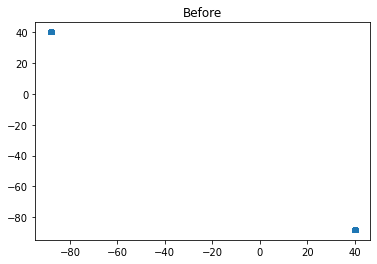

In [9]:
import matplotlib.pyplot as plt
plt.plot(rentals['Coordinates02'], rentals['Coordinates01'], 'p')
plt.title('Before')
plt.show()

Text(0.5, 1.0, 'After')

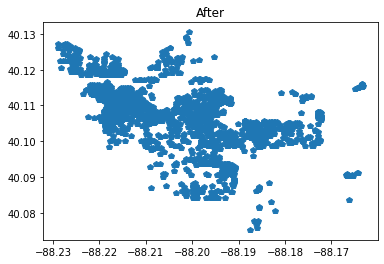

In [10]:
mask = rentals2['Longitude'].isna()
plt.plot(pd.to_numeric(rentals2[~mask]['Longitude']), pd.to_numeric(rentals2[~mask]['Latitude']), 'p')
plt.title('After')

Read the following for more information [plotting in base R](https://uofi.box.com/shared/static/adz8yj3t38x3xqnn17egwh3vvn9aswai.html) and [plotting in R's tidyverse](https://uofi.box.com/shared/static/1yr2f6qi51d5u3ncyybw8pzgb5nlxlyf.html).


***

## <a name="cleaning"></a>Cleaning data

You need to know context and background information about the data to truly fix data errors. Guessing is not appropriate, especially when money or lives are at stake. Data cleaning is a data-specific task that can be tedious and painful. Do expect to spend a long time (your allotted time multiplied by 2) on data validating and cleaning. Careful and methodical fixing of errors may yield wondrous results for your analytics team (but don't spend too much time!).

Some common data cleaning approaches include:  

 - removing duplicate observations  
 
 - fixing rounding errors and inconsistent units of measurement
 
 - removing or replacing missing values
 
 - limiting a distribution to its realistic set of observations
 
 - correcting and subsetting with dates
 
 - correcting misspelled words, abbreviations, or text cases

### <a name="appr1"></a>Approach 1 - Removing duplicate observations

Removing duplicates when the observation's duplication add no new information is helpful in data cleaning. We exercise precaution when removing observations by not removing anything from permanent data files. Use a renamed version or copy of the data in your programming language; always keep the original as the original. Creating a counter variable might be helpful to identify non-unique observations for removal.

Removing observations can be accomplished via **filtering.** For example, if we were to remove incorrect coordinate values. **This is not something we should do for this particular dataset.**

In [11]:
rentals.drop_duplicates()

,Property Address,Parcel Number,Inspection Date,Grade,License Status,Expiration Date,Mappable Address,Coordinates01,Coordinates02,Latitude,Longitude,City,State
0,607 1/2 Glover Avenue,922116177018,2015-07-24,Class B,Expired,2021-10-14,"607 1 2 Glover Avenue\r\nUrbana, IL\r\n(40.108...",40.108023,-88.193322,40.108023,-88.193322,Urbana,IL
1,1302 1/2 Hill Street,912107406011,2011-08-17,Class B,Issued,2021-10-14,"1302 1 2 Hill Street\r\nUrbana, IL\r\n(40.1193...",40.119327,-88.226119,40.119327,-88.226119,Urbana,IL
2,212 1/2 Central Avenue,912108383001,2010-04-26,Class B,Issued,NaT,"212 1 2 Central Avenue\r\nUrbana, IL",NaN,NaN,NaN,NaN,Urbana,IL
3,801 1/2 East Harding Drive,932121153003,2013-06-12,Class B,Issued,2021-10-14,"801 1 2 East Harding Drive\r\nUrbana, IL\r\n(4...",40.093806,-88.197670,40.093806,-88.19767,Urbana,IL
4,1003 1/2 East Harding Drive,932121153010,2013-07-08,Class B,Issued,2020-10-14,"1003 1 2 East Harding Drive\r\nUrbana, IL\r\n(...",40.093743,-88.195595,40.093743,-88.195595,Urbana,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,3026 East Stillwater Landing Unit 101,932122406009,2017-12-18,Class B,Issued,2021-10-14,"3026 East Stillwater Landing\r\nUrbana, IL\r\n...",40.090282,-88.165650,40.090282,-88.16565,Urbana,IL
1726,1108 South Busey Avenue,932117307003,2019-12-16,Class B,Issued,2021-10-14,"1108 South Busey Avenue\r\nUrbana, IL\r\n(40.1...",40.103107,-88.217354,40.1031074524,-88.2173538208,Urbana,IL
1727,806 Harvey Street,912107428001,2011-11-04,Class B,Issued,2021-10-14,"806 Harvey Street\r\nUrbana, IL\r\n(-88.2215, ...",-88.221500,40.119800,40.1198,-88.2215,Urbana,IL
1728,1302 East Michigan Avenue,922116376032,2016-04-18,Class B,Issued,NaT,"1302 East Michigan Avenue\r\nUrbana, IL\r\n(-8...",-88.192900,40.101700,40.1017,-88.1929,Urbana,IL


### <a name="appr2"></a>Approach 2 - Fixing rounding errors and inconsistent units of measurement

Numeric inconsistencies can plague data analysis. Fixing them can be as simple as converting the existing variable to another more accessible unit of measure (e.g. centimeters instead of inches). Re-formatting the variable may solve other numeric errors, especially when the numeric value we want is initially treated as a character string. Rounding errors may be fixed quickly by employing a function in the programming language such as ceiling, flooring, and rounding. 

We could round the latitude and longitude values of `rentals` data to the hundredths place via rounding.

In [12]:
rentals['Latitude'] = pd.to_numeric(rentals['Latitude'])
rentals['Longitude'] = pd.to_numeric(rentals['Longitude'])
rentals.round({'Latitude': 2,'Longitude':2})

,Property Address,Parcel Number,Inspection Date,Grade,License Status,Expiration Date,Mappable Address,Coordinates01,Coordinates02,Latitude,Longitude,City,State
0,607 1/2 Glover Avenue,922116177018,2015-07-24,Class B,Expired,2021-10-14,"607 1 2 Glover Avenue\r\nUrbana, IL\r\n(40.108...",40.108023,-88.193322,40.11,-88.19,Urbana,IL
1,1302 1/2 Hill Street,912107406011,2011-08-17,Class B,Issued,2021-10-14,"1302 1 2 Hill Street\r\nUrbana, IL\r\n(40.1193...",40.119327,-88.226119,40.12,-88.23,Urbana,IL
2,212 1/2 Central Avenue,912108383001,2010-04-26,Class B,Issued,NaT,"212 1 2 Central Avenue\r\nUrbana, IL",NaN,NaN,NaN,NaN,Urbana,IL
3,801 1/2 East Harding Drive,932121153003,2013-06-12,Class B,Issued,2021-10-14,"801 1 2 East Harding Drive\r\nUrbana, IL\r\n(4...",40.093806,-88.197670,40.09,-88.20,Urbana,IL
4,1003 1/2 East Harding Drive,932121153010,2013-07-08,Class B,Issued,2020-10-14,"1003 1 2 East Harding Drive\r\nUrbana, IL\r\n(...",40.093743,-88.195595,40.09,-88.20,Urbana,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,3026 East Stillwater Landing Unit 101,932122406009,2017-12-18,Class B,Issued,2021-10-14,"3026 East Stillwater Landing\r\nUrbana, IL\r\n...",40.090282,-88.165650,40.09,-88.17,Urbana,IL
1726,1108 South Busey Avenue,932117307003,2019-12-16,Class B,Issued,2021-10-14,"1108 South Busey Avenue\r\nUrbana, IL\r\n(40.1...",40.103107,-88.217354,40.10,-88.22,Urbana,IL
1727,806 Harvey Street,912107428001,2011-11-04,Class B,Issued,2021-10-14,"806 Harvey Street\r\nUrbana, IL\r\n(-88.2215, ...",-88.221500,40.119800,40.12,-88.22,Urbana,IL
1728,1302 East Michigan Avenue,922116376032,2016-04-18,Class B,Issued,NaT,"1302 East Michigan Avenue\r\nUrbana, IL\r\n(-8...",-88.192900,40.101700,40.10,-88.19,Urbana,IL


### <a name="appr3"></a>Approach 3 - Removing or replacing missing values

A missing value may actually be informative for a particular data analysis. Thus, be cautious when removing missing values from a dataset. Consider why or how the missing values came to be and what information you may be discarding by removing missing values. If a value is missing completely at random, then removal is usually safe.

The **dplyr** package has the `drop_na()` function which quickly removes NAs from a dataset.

We could apply the `drop_na()` function on the entire `rentals2` data. **Again, this is not something that is necessary for this particular dataset.**

In [13]:
rentals2.dropna()

,Property Address,Parcel Number,Inspection Date,Grade,License Status,Expiration Date,Latitude,Longitude,City,State
0,607 1/2 Glover Avenue,922116177018,2015-07-24,Class B,Expired,2021-10-14,40.108023,-88.193322,Urbana,IL
1,1302 1/2 Hill Street,912107406011,2011-08-17,Class B,Issued,2021-10-14,40.119327,-88.226119,Urbana,IL
3,801 1/2 East Harding Drive,932121153003,2013-06-12,Class B,Issued,2021-10-14,40.093806,-88.19767,Urbana,IL
4,1003 1/2 East Harding Drive,932121153010,2013-07-08,Class B,Issued,2020-10-14,40.093743,-88.195595,Urbana,IL
5,1204 1/2 North Goodwin Avenue,912107276001,2011-10-20,Class B,Issued,2021-10-14,40.123423,-88.22415,Urbana,IL
...,...,...,...,...,...,...,...,...,...,...
1722,401 West Springfield Avenue,922117131006,2019-03-04,Class B,Issued,2021-10-14,40.112118,-88.211975,Urbana,IL
1724,2005 Bruce Drive,932121178007,2013-06-04,Class A,Issued,2021-10-14,40.0928,-88.1932,Urbana,IL
1725,3026 East Stillwater Landing Unit 101,932122406009,2017-12-18,Class B,Issued,2021-10-14,40.090282,-88.16565,Urbana,IL
1726,1108 South Busey Avenue,932117307003,2019-12-16,Class B,Issued,2021-10-14,40.1031074524,-88.2173538208,Urbana,IL


### <a name="appr4"></a>Approach 4 - Limiting a distribution to its realistic set of observations

This essentially means subsetting with conditions on numeric variables. Again, filtering work here.

For example, if we were to remove incorrect coordinate values. **This is not something we should do for this particular dataset.**

In [14]:
rentals[(30<=rentals['Coordinates01']) &(rentals['Coordinates01']<=50) &
        (-90<=rentals['Coordinates02']) &(rentals['Coordinates02']<=-70)]

,Property Address,Parcel Number,Inspection Date,Grade,License Status,Expiration Date,Mappable Address,Coordinates01,Coordinates02,Latitude,Longitude,City,State
0,607 1/2 Glover Avenue,922116177018,2015-07-24,Class B,Expired,2021-10-14,"607 1 2 Glover Avenue\r\nUrbana, IL\r\n(40.108...",40.108023,-88.193322,40.108023,-88.193322,Urbana,IL
1,1302 1/2 Hill Street,912107406011,2011-08-17,Class B,Issued,2021-10-14,"1302 1 2 Hill Street\r\nUrbana, IL\r\n(40.1193...",40.119327,-88.226119,40.119327,-88.226119,Urbana,IL
3,801 1/2 East Harding Drive,932121153003,2013-06-12,Class B,Issued,2021-10-14,"801 1 2 East Harding Drive\r\nUrbana, IL\r\n(4...",40.093806,-88.197670,40.093806,-88.197670,Urbana,IL
4,1003 1/2 East Harding Drive,932121153010,2013-07-08,Class B,Issued,2020-10-14,"1003 1 2 East Harding Drive\r\nUrbana, IL\r\n(...",40.093743,-88.195595,40.093743,-88.195595,Urbana,IL
5,1204 1/2 North Goodwin Avenue,912107276001,2011-10-20,Class B,Issued,2021-10-14,"1204 1 2 North Goodwin Avenue\r\nUrbana, IL\r\...",40.123423,-88.224150,40.123423,-88.224150,Urbana,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,1203 East Willard Street,932121380014,2017-03-28,Class B,Issued,2021-10-14,"1203 East Willard Street\r\nUrbana, IL\r\n(40....",40.084072,-88.193000,40.084072,-88.193000,Urbana,IL
1707,2211 South Philo Road,932121332019,2017-08-03,Class C,Issued,2021-10-14,"2211 South Philo Road\r\nUrbana, IL\r\n(40.088...",40.088790,-88.190956,40.088790,-88.190956,Urbana,IL
1722,401 West Springfield Avenue,922117131006,2019-03-04,Class B,Issued,2021-10-14,"401 West Springfield Avenue\r\nUrbana, IL\r\n(...",40.112118,-88.211975,40.112118,-88.211975,Urbana,IL
1725,3026 East Stillwater Landing Unit 101,932122406009,2017-12-18,Class B,Issued,2021-10-14,"3026 East Stillwater Landing\r\nUrbana, IL\r\n...",40.090282,-88.165650,40.090282,-88.165650,Urbana,IL


### <a name="appr5"></a>Approach 5 - Correcting and subsetting with dates

This might also be considered subsetting and applying functions and operators for dates and times.

In [15]:
rentals2[(rentals2['Inspection Date'] < '2021-01-01') & (rentals2['Inspection Date'] > '2019-12-31')]

,Property Address,Parcel Number,Inspection Date,Grade,License Status,Expiration Date,Latitude,Longitude,City,State
46,308 East Iowa Street,932117426024,2020-01-17,Class B,Issued,2021-10-14,40.1049842834,-88.2038574219,Urbana,IL
103,308 East Oregon Street,922117280010,2020-03-04,Class B,Issued,2021-10-14,40.1078109741,-88.2038803101,Urbana,IL
135,605 West Iowa Street,932117306016,2020-02-24,Class B,Issued,2021-10-14,40.104366,-88.21508,Urbana,IL
140,505 South Maple Street,922117277009,2020-01-07,Class B,Issued,2021-10-14,40.1087875366,-88.2027435303,Urbana,IL
143,205 West Pennsylvania Avenue,932117381007,2020-02-25,Class B,Issued,2021-10-14,40.100433,-88.21027,Urbana,IL
171,712 South Maple Street,922117286009,2020-02-12,Class B,Issued,2021-10-14,40.1066246033,-88.2021255493,Urbana,IL
237,1506 South Vine Street,932117478009,2020-03-03,Class B,Issued,2021-10-14,40.0990257263,-88.204536438,Urbana,IL
278,710 South Maple Street,922117286008,2020-01-14,Class C,Issued,2021-10-14,40.1067695618,-88.2021255493,Urbana,IL
291,206 West Florida Avenue,932117383017,2020-02-27,Class B,Issued,2021-10-14,40.0985336304,-88.2102432251,Urbana,IL
292,800 South Vine Street,922117284041,2020-01-29,Class B,Issued,2021-10-14,40.106475,-88.204574,Urbana,IL


### <a name="appr6"></a>Approach 6 - Correcting misspelled words, abbreviations, or text cases

With unstructured text data, correcting spellings comes up often. When it is important that words should be spelled correctly, a data engineer can spend time addressing it. However, it may be untenable to attempt to correctly spell each word in a text dataset. (Also, the text source's intent should be considered, such as African American Vernacular English, and other vernaculars that appear in writing). Another aspect of text data cleaning is deciding what to do with the case of the words in the text. Processing text might go smoother if we lower (or upper) the case on all text. For specific variables in a structured dataset, changing the case to a proper case might be beneficial (e.g. people's name, business name).

We can place all property addresses, grade, and cities in all caps.

In [16]:
rentals2['Property Address'] = rentals2['Property Address'].str.upper()
rentals2['Grade'] = rentals2['Grade'].str.upper()
rentals2['City'] = rentals2['City'].str.upper()

#### END OF NOTES